<a href="https://colab.research.google.com/github/koushikpr/Machine-Learning-Prerequisites/blob/Deep-Computer-Vision/Deep_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Computer Vision**

---



So far we have dealt with processing various datas in 1D and 2D. To process data in 3D we are going to be using Convolution Neural Networking. So we are going to use CNN to for image classification and object recognision. So here are the parameters of interest.
*   Image data
*   Convolution Layer 
*   Pooling Layer
*   CNN Architecture






### Image Data

Images are made of 3 dimensions:
1. Image width
2. Image height
3. Color channel

Color channels represent the depth of the colors in a picture. For a basic picture there are RGB layers comprising pixels of different Grayscale values btw 0-255

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png)


### Convolution Layer

In Dense Neural Networks, we use dense layers which detect patterns globally or in the entire picture. Convolution Layers help predict patterns within the picture providing a proper classification compare to dense layers.
We are going to predict if this is a cat or not

![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/cat_weight_ref_guide/1800x1200_cat_weight_ref_guide.jpg)

Dense layer can predict the pattern of the eyes ears nose at the exact location and same pattern, whereas convolution layer can match the pattern across the entire picture. in any orientation and size.

In our models it is quite common to have more than one convolutional layer. Even the basic example we will use in this guide will be made up of 3 convolutional layers. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second layer will take as input these lines and start forming shapes or polygons. Finally, the last layer might take these shapes and determine which combiantions make up a specific image.





### Feature maps

So when our convolution layer matches a pattern, it creates a 3D tensor containing the pattern and process it through a filter to a response map which matches the pattern at different locations of the data.
![alt text](https://drive.google.com/uc?export=view&id=1HcLvvLKvLCCGuGZPMvKYz437FbbCC2eB)


PADDING:When the patterns from the response map are slightly larger/smaller than the original data, we add rows or columns centred to the data called padding.

STRIDE: This represents how many row/columns we move every time an image is moved.

### Pooling Layer

Pooling layer is similar to convolution layer. We take a 2x2 samples of our feature maps and find its matching similarities by scaling it by max, min or average.

### Creating our convnet

So here we are going to be classifying objects we see daily using CNN

The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the CIFAR Image Dataset. It contains 60,000 32x32 color images with 6000 images of each class.

The labels in this dataset are the following:

Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

Step 1: Setup

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
%tensorflow_version 2.x

Step 2: Loading the Dataset

In [2]:
(train,trainlabel),(test,testlabel) = datasets.cifar10.load_data()
#converting pixels btw 0 and 1
train = train/255.0
test = test/255.0

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
train.shape              

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

So we have 50000 images of 32x32 made of 3 layers for this model

Step 3: Looking at the Data

Text(0.5, 0, 'truck')

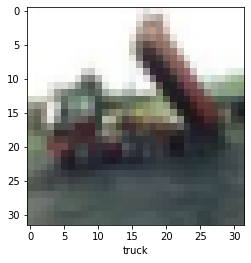

In [3]:
plt.imshow(train[2],cmap=plt.cm.binary)
plt.xlabel(classes[trainlabel[2][0]])


Step 4:CNN Architecture-> So a CNN architechture consists of set of convolution and pooling layers densely connected and flattened overall.

In [4]:
mdl = models.Sequential()
mdl.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3,)))#input layer
mdl.add(layers.MaxPooling2D((2,2)))#pooling at strides 2,2
mdl.add(layers.Conv2D(64,(3,3),activation='relu',))#another feature map layer with more depth(filters)
mdl.add(layers.MaxPooling2D((2,2)))#repeat
mdl.add(layers.Conv2D(64,(3,3),activation='relu',))#repeat

mdl.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Now if we notice as we go down the layers, the image dimensions decreases from 30x30 to 4x4 but the depth of image has increased. 

Step 5: Adding Dense layers after we finished extracting the features

In [5]:
mdl.add(layers.Flatten())#data flattening
mdl.add(layers.Dense(64,activation='relu'))#Hidden layer for complexity
mdl.add(layers.Dense(10))#output layer for classifying to 10 classes
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Step 6:Training the model using fit

In [6]:
mdl.compile(optimizer='adam',#preotimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#known loss
              metrics=['accuracy'])#priority metric

new = mdl.fit(train,trainlabel,epochs=4,validation_data=(test,testlabel))#low epochs for now

Epoch 1/4
1563/1563 [==============================] - 80s 50ms/step - loss: 1.5144 - accuracy: 0.4463 - val_loss: 1.2840 - val_accuracy: 0.5442
Epoch 2/4
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1672 - accuracy: 0.5853 - val_loss: 1.0990 - val_accuracy: 0.6117
Epoch 3/4
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0123 - accuracy: 0.6404 - val_loss: 0.9904 - val_accuracy: 0.6557
Epoch 4/4
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9120 - accuracy: 0.6795 - val_loss: 0.9389 - val_accuracy: 0.6708


Step 7: Evaluating the Model

In [7]:
loss,accur = mdl.evaluate(test,testlabel,verbose=2)

313/313 - 4s - loss: 0.9389 - accuracy: 0.6708 - 4s/epoch - 11ms/step


So our accuracy is 67 percent due to low epochs add few more for more better ones

Step 8:Prediction

deer


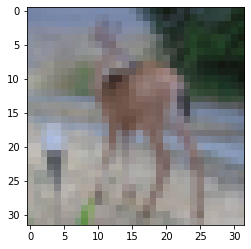

In [8]:
import numpy as np

p = mdl.predict(test)#finding the pdf
x = np.argmax(p[100])#locating the max probability value
print(classes[x])#accessing that class name
plt.imshow(test[100],cmap=plt.cm.binary)#showing the image
plt.show()

Therefore it works, but in many cases we will not have many training datasets, So this may not be that accurate in that case.

### Working With Small Dataset 

When working with small datasets, we create our own set of datas for training from the existing datas. These datas are replicas of the original datas but are either compressed,rotated,stretched or color graded. Let us create our own sets of datas

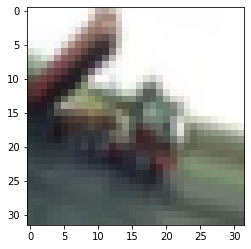

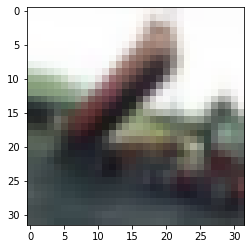

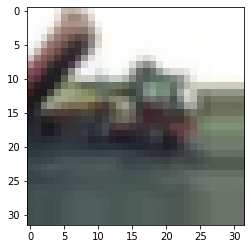

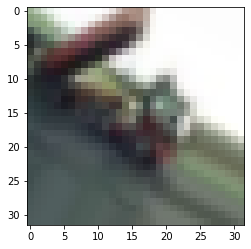

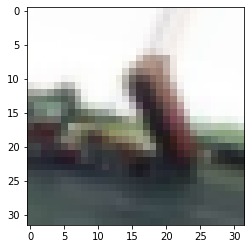

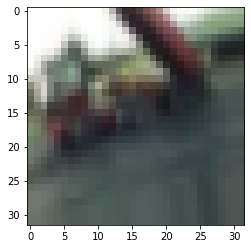

In [9]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#image generator with specific parameters
datagenerator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
#choose an image
timg = train[2]
#convert into array
img = image.img_to_array(timg)
#reshaping to a single row
img = img.reshape((1,)+img.shape)
no_of_images=5
#generating images
for x in datagenerator.flow(img,save_prefix='test',save_format='jpeg'):
  plt.figure(no_of_images)
  plot = plt.imshow(image.img_to_array(x[0]))
  no_of_images -=1
  if no_of_images<0:
    break

plt.show()

We notice these are custom made and provide an accuracy of 70%.

### Pre-Trained Models

We have pre-Trained Models developed and stored in tensorflow reducing time and complexity by a large factor(<10,000 images)

Fine tuning: Fine tuning is a process of prioritizing layers for accurate classification, which is not possible when layers overlap and analysis layerwise tends to different shapes and sizes.

Step 1: Setup

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import os
keras = tf.keras

Step 2: Loading the Dataset 'Cats vs Dogs'


In [11]:
tfds.disable_progress_bar()

#spliting the dataset to 80% training,10%testing, and 10% validation
(training,validation,testing), md= tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteP4STTP/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


Step 3: Reading the Data

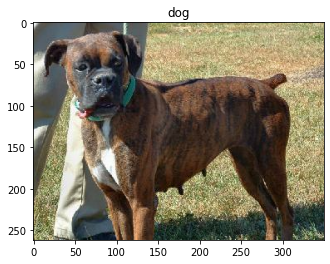

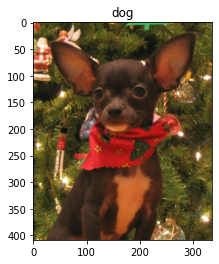

In [12]:
labelname = md.features['label'].int2str #extracts the labels from md and converts all to string
for i,label in training.take(2):#takes random 2 pictures carrying the image and label
  plt.figure()
  plt.imshow(i)
  plt.title(labelname(label))

Step 4: Scaling Data to Same size

In [13]:
size = 160

def sping(image,label):
  image = tf.cast(image,dtype=tf.float32)#converts image to float
  image = (image/127.5) - 1#reducing the value by half of grayscale
  image = tf.image.resize(image,(size,size))#resizing to 160x160
  return image,label


Step 5: applying the resize to all


In [14]:
train = training.map(sping)
test = testing.map(sping)
validate = validation.map(sping)

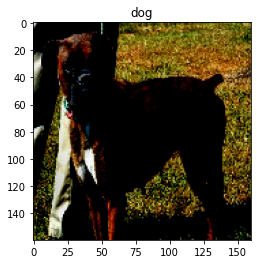

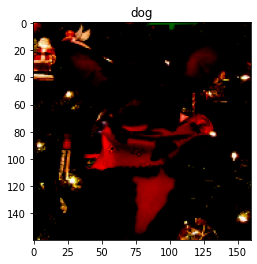

In [15]:
labelname = md.features['label'].int2str #extracts the labels from md and converts all to string
for i,label in train.take(2):#takes random 2 pictures carrying the image and label
  plt.figure()
  plt.imshow(i)
  plt.title(labelname(label))

In [16]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validate.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

###Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

In [17]:
imgshape = (size,size,3)
model = keras.applications.MobileNetV2(input_shape=imgshape,
                                       include_top=False,
                                       weights='imagenet')


9420800/9406464 [==============================] - 0s 0us/step


In [18]:
model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

As we can see there are many layers providing deep learning of data.

step 6: Freezing the training

In [19]:
model.trainable=False

Step 7: Adding a classifier that converts the 5x5 pixel data to a single 1280 picture and then a dense layer for prediction

In [20]:
final_model = tf.keras.Sequential([
    model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1)
])
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


Step 8: Training the Model

In [21]:
rate = 0.000001

final_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Step 7: Evaulating the Model

In [22]:
los,accu = final_model.evaluate(validation_batches,steps=20)
print(accu)

20/20 [==============================] - 11s 464ms/step - loss: 0.6999 - accuracy: 0.5547
0.5546875


As u notice the accuracy is low, lets train it on our images

In [23]:
preddd = final_model.fit(train_batches,epochs=3,validation_data=validation_batches)


Epoch 1/3
582/582 [==============================] - 310s 526ms/step - loss: 0.6767 - accuracy: 0.5833 - val_loss: 0.6673 - val_accuracy: 0.5851
Epoch 2/3
582/582 [==============================] - 311s 531ms/step - loss: 0.6457 - accuracy: 0.6055 - val_loss: 0.6381 - val_accuracy: 0.6028
Epoch 3/3
582/582 [==============================] - 310s 530ms/step - loss: 0.6166 - accuracy: 0.6256 - val_loss: 0.6105 - val_accuracy: 0.6260


TypeError: ignored

Step 10: Saving and Loading our Model

In [24]:
final_model.save("dogsvscats.h5")
openingmodel = tf.keras.models.load_model('dogsvscats.h5')
openingmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________
